## MATEMÁTICAS DISCRETAS: Teoría de Grafos

## Notebook 1: Representación de grafos y conexidad

1. Construir la representación gráfica del grafo que modela la situación presentada. Recuerde que el grafo es ponderado.
2. Determinar si el grafo está completamente conectado (Pista: puede usar BFS o DFS).

### Librerias
Las librerias que usaremos seran:

**math** : Calcular la distancia entre los nodos y realizar otras operaciones aritmeticas.

**matplotlib** y **networkx** : Representar el grafo y arbol de expasión.

In [1]:
import math
import matplotlib.pyplot as plt
import networkx as nx

### Clases

Usaremos la clase **Nodo** para almacenar el nombre del vertice y su posicion en el plano cartesiano *XY*

In [2]:
class Nodo:
    def __init__(self,nombre,x,y):
        self.nombre = nombre
        self.x = x
        self.y = y
        self.adyacentes = []

### Funciones
* **calcularPeso :** Usaremos esta funcón para calcular el peso de las aristas

In [3]:
def calcularPeso(nodoA, nodoB):
    deltaX = (nodoA.x - nodoB.x)*100
    deltaY = (nodoA.y - nodoB.y)*100
    distancia = math.sqrt(  pow(deltaX,2) + pow(deltaY,2)  )
    return distancia

### Estructuras de datos iniciales

In [4]:
# Declaracion de la matriz vertices en donde se encuentran la posiciones de nuestro nodos  
vertices = [         
    ["A", 2,  1 ],
    ["B", 19, 1 ],
    ["C", 5,  2 ],
    ["D", 11, 3 ],
    ["E", 18, 5 ],
    ["F", 4,  6 ],
    ["G", 12, 7 ],
    ["H", 20, 8 ],
    ["I", 16, 10],
    ["J", 10, 10],
    ["K", 7,  11],
    ["L", 5,  13],
    ["M", 11, 13],           
    ["N", 19, 14],
    ["O", 16, 16],
    ["P", 4,  17],
    ["Q", 9,  17],
    ["R", 11, 19],
    ["S", 1,  20],
    ["T", 20, 20] 
]

# Declaracion de la matriz adyacencia en donde esta las relaciones de adyacencia de nuestros nodos
adyacencia = [    
    [0 , 1 , 1 , 0 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
    [1 , 0 , 0 , 1 , 1 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
    [1 , 0 , 0 , 1 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
    [0 , 1 , 1 , 0 , 1 , 1 , 1 , 1 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
    [0 , 1 , 0 , 1 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
    [1 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0],
    [1 , 1 , 1 , 1 , 1 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
    [0 , 1 , 0 , 1 , 1 , 0 , 1 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
    [0 , 0 , 0 , 0 , 1 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0],
    [0 , 0 , 0 , 1 , 0 , 0 , 1 , 0 , 0 , 0 , 1 , 0 , 1 , 1 , 1 , 0 , 1 , 0 , 0 , 0],
    [0 , 0 , 0 , 1 , 0 , 1 , 0 , 0 , 0 , 1 , 0 , 1 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0],
    [0 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 1 , 0 , 1 , 0 , 1 , 1 , 1 , 0 , 0 , 0],
    [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 1 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0],
    [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 1],
    [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 1 , 0 , 1 , 0 , 0 , 1 , 1 , 0 , 1],
    [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 0 , 0 , 1 , 0 , 1 , 0],
    [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 0 , 1 , 1 , 0 , 0 , 1 , 0],
    [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 1 , 0 , 0 , 0 , 1 , 1],
    [0 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 1],
    [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 0 , 1 , 1 , 0],            
]

### Determinar el tipo de Grafo

Para determinar si nuestro grafo es dirigido o no, usaremos la matriz de adyacencia.

Un grafo no dirigido o grafo propiamente dicho es un grafo $G = (V,E)$

$$V \neq \emptyset$$
$$  E\subseteq \{x\in {\mathcal {P}}(V):|x|=2\}    $$

Un **par no ordenado** es un conjunto de la forma $\{a,b\}$, de manera que $ \{a,b\}=\{b,a\}$.

Para los grafos, estos conjuntos pertenecen al conjunto potencia de $ V$, denotado ${\mathcal {P}}(V)$, y son de cardinalidad 2.

Sabiendo esto lo que haremos sera recorrer la matriz de adyacencia y comprobar que para cada pareja $\{a,b\}$ tambien se encuentre la pareja $\{b,a\}$


Con este codigo podemos verificar que nuestro grafo es no dirigido

In [5]:
noDirigido = True
for i in range(0,20):
     for j in range(0,20):
        if ( adyacencia[i][j] != adyacencia[j][i]):
            noDirigido = False  

if noDirigido == True:
    print("Este es un grafo no dirigido")
else:
    print("Este es un grafo dirigido")

Este es un grafo no dirigido


### Arreglos nodos[ ] y aristas[ ] 
* **nodos :** Almacenan los nodos de nuestro grafo
* **aristas :** Almacenan las aristas de nuestro grafo con sus respectivos pesos

In [6]:
# Haciendo uso de la matriz vertices y la clase Nodo
# Creamos un objeto Nodo el cual almacenara el nombre del vertice y sus coordenadas
nodos = []
for i in range(0,len(vertices)):
    nombre = vertices[i][0]
    x = vertices[i][1]
    y = vertices[i][2]    
    newNodo = Nodo(nombre,x,y)
    nodos.append(newNodo)
    
# Haciendo uso de nuestro arreglo de nodos y la matriz de adyacencia
# Agregamos las aritas de nuestro grafo a un arreglo de aristas con sus respectivos pesos
# Simultaneamente tambien agregamos a cada objeto Nodo sus Nodos adyacentes
aristas = []
for i in range(0, 20):    
    for j in range (0,20):
        if i < j:
            if(adyacencia[i][j] == 1):
                # Aqui creamos las aristas con sus pesos
                a = nodos[i].nombre
                b = nodos[j].nombre                
                c = calcularPeso(nodos[i],nodos[j])
                c = round(c,2)
                aristas.append( [a,b,c] )   
                
                # Aqui agregamos los Nodos adyacentes a cada Nodo perteneciente a nuestro arreglo nodos
                nodos[i].adyacentes.append(nodos[j])
                nodos[j].adyacentes.append(nodos[i])

## 1. Representación del Grafo

Para representar el grafo usaremos la libreria **networkx** la cual llamaremos *nx*.
La representación del grafo consta de 2 partes:
1. Transcripcion
2. Dibujado
    
   **Transcripción**
    * Crear un grafo $G$ de la libreria *nx*
    * Añadir las aristas de nuestro arreglo *aristas* en $G$
    * Crear un diccionario *dict* en donde guardaremos las posiciones correspondientes a cada vertice

   **Dibujado**
    * Ajustar el tamaño del *canvas*
    * Dibujar los nodos
    * Dibujar las aristas
    * Dibujar las etiquetas de los nodos
    * Dibujas las etiquetas y pesos de las aritas
    * Mostrar el grafo

### Transcripción

In [7]:
# Creacion del grafo
G = nx.Graph()

# Añadimos las aristas a nuestro grafo
# Debido que para que una arista exista se necesitan de dos nodos, los nodos se añaden simultaneamente
for arista in aristas:
    a = arista[0]
    b = arista[1]
    peso = arista[2]
    G.add_edge( a , b, weight = peso)
    
# Diccionario con las posiciones de todos los nodos
dict = {}
for nodo in vertices:
    nombre = nodo[0]
    xPos = nodo[1]
    yPos = nodo[2]
    dict[nombre] = (xPos,yPos)    
pos = dict  

### Dibujado

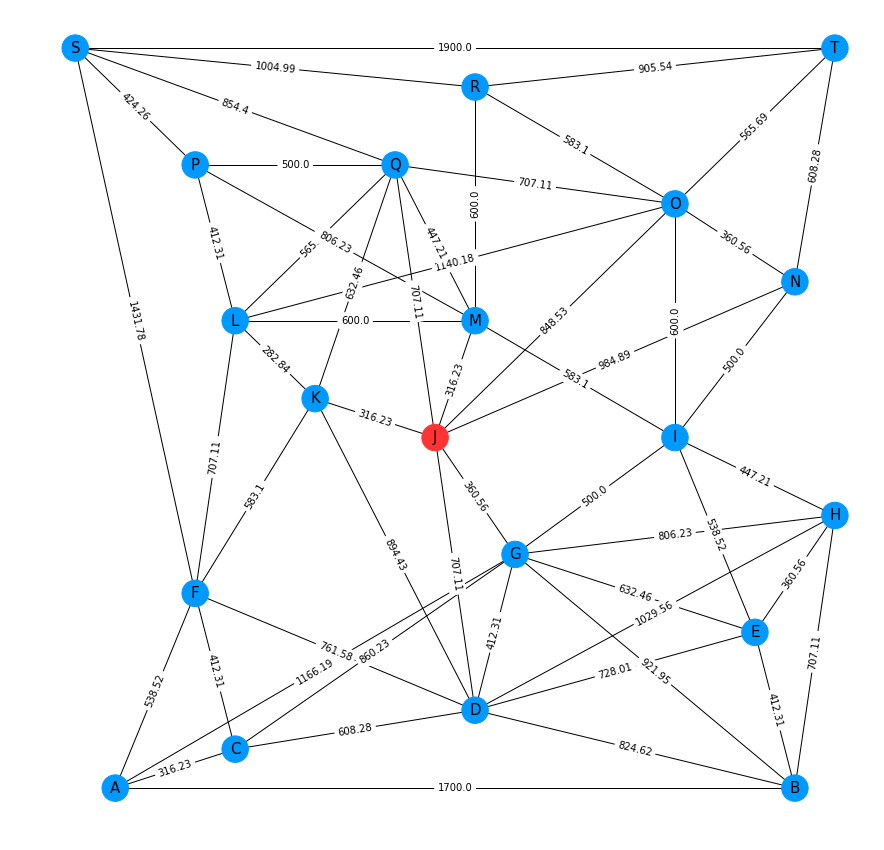

In [8]:
# Tamaño del Canvas
plt.figure(figsize = (15,15))

# Se dibujan los nodos
val_map = {'J': (1,0.2,0.2)}
values = [ val_map.get(node , (0, 0.6, 1)) for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=700,node_color = values)

# Se dibujan las aristas
nx.draw_networkx_edges(G, pos, width=1)

# Se dibujan los nombres de los nodos y el peso de las aristas
nx.draw_networkx_labels(G, pos, font_size=15, font_family='sans-serif')
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos, edge_labels = edge_labels)

plt.axis("off") # Con esta linea ocultamos los ejes de coordenadas
plt.show()      # Mostramos todas las llaadas de dibujado realizadas anteriormente

## 2. Determinar si el grafo esta completamente conectado

#### Definición
Un grafo $G$ se dice conexo si, para cualquier par de vértices *u* y *v* en *G*, existe al menos una trayectoria (una sucesión de vértices adyacentes que no repita vértices) de *u* a *v*.

#### Caracteristicas
Se puede determinar si un grafo es conexo usando un algoritmo **Búsqueda en anchura (BFS)** o Búsqueda en profundidad (DFS).

## Breadth-first search (BFS)

### Procedimiento

* Dado un vértice fuente **s**, *Breadth-first* search sistemáticamente explora los vértices de G para “descubrir” todos los vértices alcanzables desde **s**.
* Calcula la distancia (menor número de vértices) desde **s** a todos los vértices alcanzables.
* Después produce un árbol **BF** con raíz en **s** y que contiene a todos los vértices alcanzables.
* El camino desde **dt** a cada vértice en este recorrido contiene el mínimo número de vértices. Es el camino más corto medido en número de vértices.
* Su nombre se debe a que expande uniformemente la frontera entre lo descubierto y lo no descubierto. Llega a los nodos de distancia k, sólo tras haber llegado a todos los nodos a distancia k-1.


### Implementación
**Datos de entrada**
* **grafo: ** Diccionario en el cual se almacena como indice el **nombre** del nodo y como items sus nodos **adyacentes**
* **sNode: ** Objeto Nodo el cual usaremos como **raiz** del arbol de expansion

In [9]:
def BFS(grafo, sNode):
    infinito = float('inf')       
    
    estado = {}      # Almacena si cada nodo ha sido visitado
    distancia = {}   # Almacena la distancia del nodo raiz a cada nodo en numero de aristas
    padre = {}       # Almacena el nodo padre de cada nodo
    adyacencia = []  # Almacena los nodos adyacentes del nodo iterado
    
    # Valores iniciales de cada nodo del grado
    for v in grafo: 
        estado[v] = False
        distancia[v] = infinito
        padre[v] = None       
        
    # Valores iniciales del Nodo raiz
    s = sNode.nombre 
    estado[s] = True
    distancia[s] = 0
    padre[s] = None    
       
    # Agregamos nuestro nodo raiz a la cola
    cola = [s]
    
    while cola: # El bucle se ejecutara siempre que la cola siga teniendo elementos
        
        v = cola.pop(0)         # Extraemos el primer elemento de la cola y lo guardamos en v
        adyacencia = grafo[v]   # Almacenamos los nodos adyacente de v
    
        for u in adyacencia: # Recorremos todos los nodos adyacentes de v
            # Si es la primera vez que visitamos el nodo realizamo las siguiente asignaciones
            if estado[u] == False:   
                estado[u] = True                   # Decimos que ya ha sido visitado
                distancia[u] = distancia[v] + 1    # Aumentamos la distancia del nodo raiz actual en 1
                padre[u] = v                       # Asignamos como padre de u el nodo v
                cola.insert(0,u)                   # Agregamos a u en la cola
                
# Retornamos los diccionarios padre y distancia, seran necesarios para representar correctamente nuestro arbol de expansion
    return [padre,distancia]   

**Creacion de nuestro diccionario grafo**

In [10]:
# Almacenamos nuestro grafo en un diccionario para así recorrerlo usando nuestro algoritmo BFS
# Cada indice del diccionario hace referencia a un vertice 
# y su items hacen referencia a los vertices adyacentes a dicho vertice

grafo = {} 
for node in nodos:
    adyacentesNombre = []
    for iNode in node.adyacentes:
        adyacentesNombre.append(iNode.nombre)
        
    grafo[node.nombre] = adyacentesNombre    

Con este codigo podemos evidenciar la estructura del diccionario *grafo*

In [11]:
print("Vertice     Vertices adyacentes")
print("")
for i in grafo:
    s = "   "
    s = s + i + "        "
    for j in grafo[i]:
        s = s + j + " "
    
    print(s)

Vertice     Vertices adyacentes

   A        B C F G 
   B        A D E G H 
   C        A D F G 
   D        B C E F G H J K 
   E        B D G H I 
   F        A C D K L S 
   G        A B C D E H I J 
   H        B D E G I 
   I        E G H M N O 
   J        D G K M N O Q 
   K        D F J L Q 
   L        F K M O P Q 
   M        I J L P Q R 
   N        I J O T 
   O        I J L N Q R T 
   P        L M Q S 
   Q        J K L M O P S 
   R        M O S T 
   S        F P Q R T 
   T        N O R S 


### Ejecución de Breadth First Search 

In [12]:
bfs = BFS(grafo, nodos[0])
tree = bfs[0]   ## Diccionario padre, podremos usarlos como nuestras aristas
coord = bfs[1]  ## Diccionario distancia la cual podemos usarla como niveles, luego seran nuestras coordenadas en el eje Y

### Representación del Arbol de Expansión

De forma similar a la representación de nuestro grafo original realizaremos ahora la representación de nuestro arbol de expansion, solo que ahora usaremos los dicionarios *tree* y *coord* para asignar las aristas y coordenadas de nuestro arbol de expansion.

En este caso podemos dividir la representacion en la siguientes partes:
1. Asignación
2. Dibujado

    **Asignación**
    * Creamos un nuevo grafo $G$
    * Agregamos las aristas almacenadas en el diccionario *tree*
    * Asignamos la coordenadas para cada nodo
    
   **Dibujado**
    * Ajustar el tamaño del canvas
    * Dibujar nodos
    * Dibujar aristas
    * Dibujar etiquetas de los nodos
    * Mostrar el arbol


### Asignación

In [13]:
# Creacion del grafo
G = nx.Graph()

# Agregamos las aristas al grafo
for x in tree:
    if(tree[x] != None):
        G.add_edge(tree[x],x)       

# Calculamos cuantos niveles tiene nuestro arbol
lastLvl = 0
for i in coord:
    x = coord[i]
    if(x > lastLvl):
        lastLvl = x
        
lastLvl = lastLvl + 1
# Creamos una matriz levels en el que organizaremos los nodos por nivel
# Cada arreglo/fila es un nivel y sus elementos son los nodos de dicho nivel
levels = [[] for i in range(lastLvl)] 

# coord almacena el nivel al que pertenece cada nodo
# Asi que agregamos dicho nodo a su posicion correspondiente en el arreglo levels
for i in coord:
    x = coord[i]
    levels[x].append(i)

dict2 = {}  # Diccionario con las coordenadas de cada nodo
ancho = 12 # Dividimos el eje x en 12 secciones donde se repartiran los nodos por nivel

for i in range(lastLvl): # Recorremos todos los niveles
    t = len(levels[i])   # En t almacenamos la cantidad de nodos de cada nivel
    
    # Este bucle se ejecutara para cada nivel del arbol el cual recorrera todos los nodos de dicho nivel
    for j in range(t):  
        
        # Con estas operaciones repartimos uniformemente la posiciones de los nodos de dicho nivel 
        xPos = ancho/(t+1)
        xPos = xPos*(j+1)
        xPos = round(xPos,2)
        # Como queremos que nuestro arbol empiece desde arriba invertimos los niveles
        yPos = lastLvl - i
        # Accedemos al nombre del nodo en el que actualmente estamos
        nombre = levels[i][j]
        # Agregamos el nodo y sus respectivas coordenadas a nuestro diccionario de posiciones
        dict2[nombre] = (xPos,yPos)

# Terminado de agregar todos los nodos y sus posiciones agregamos nuestro diccionario en una variable pos
pos=dict2

### Dibujado

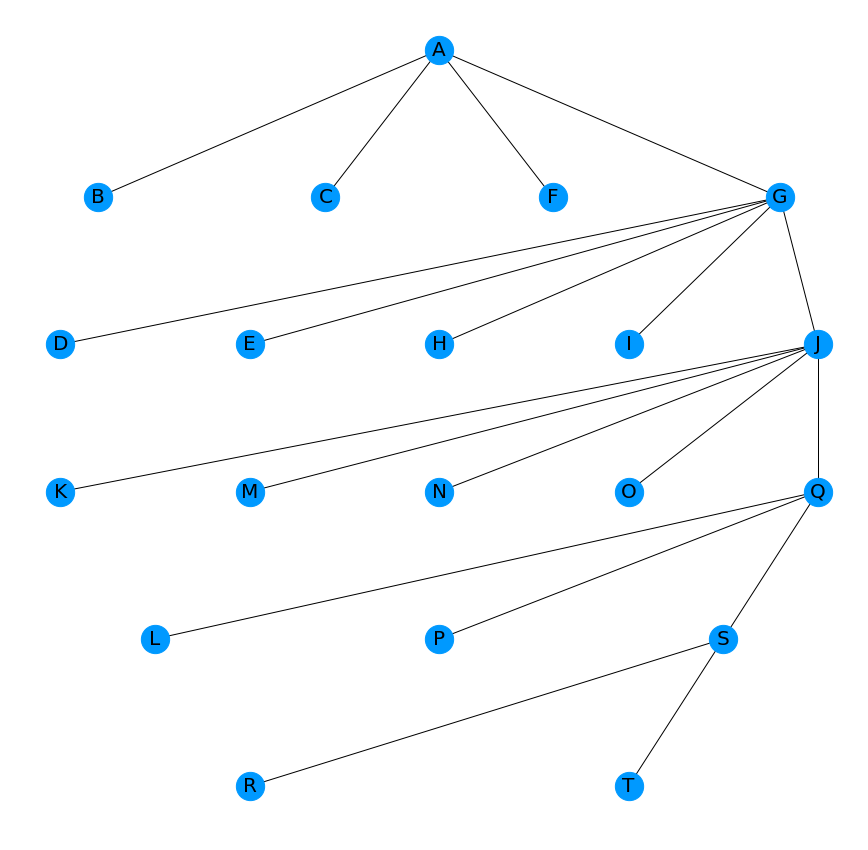

In [14]:
# Tamaño del Canvas     
plt.figure(figsize = (15,15))
# Se dibujan los nodos
nx.draw_networkx_nodes(G, pos, node_size=800, node_color =  (0, 0.6, 1))
# Se dibujan las aristas
nx.draw_networkx_edges(G, pos, width=1, Arrows = True)
# Se dibujan las etiquetas de las aristas
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis("off") # Ocultamos los ejes de coordenadas
plt.show()      # Mostramos nuestro arbol de expansion

### Conclusion
Como podemos ver al representar nuestro arbol de expansion cada nodo esta conectado a otro nodo por una unica arista y podemos llegar de cualquier nodo a cualquier otro nodos sin repetir vertices, lo cual cumple con nuestra definición de grafo conexo.

*Matematicas Discretas - Universidad Industrial de Santander*

* *Brayan Esneider Monroy Chaparo*
* *Juan Jose*
* *Sebastian Leon*